In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [77]:
np.random.seed(1)
NUM_TRIALS = 2000
BANDIT_MEANS = [5, 10, 15]


class Bandit:
  def __init__(self, true_mean):
    self.true_mean = true_mean
    # parameters for mu - prior is N(0,1)
    self.m = 5
    self.lambda_ = 1
    self.tau = 1
    self.N = 0

  def pull(self):
    return np.random.randn() / np.sqrt(self.tau) + self.true_mean

  def sample(self):
    return np.random.randn() / np.sqrt(self.lambda_) + self.m

  def update(self, x):
    self.m = (self.tau * x + self.lambda_ * self.m) / (self.tau + self.lambda_)
    self.lambda_ += self.tau
    self.N += 1

In [78]:
def plot(bandits, trial):
  x = np.linspace(-3, 25, 200)
  for b in bandits:
    y = norm.pdf(x, b.m, np.sqrt(1. / b.lambda_))
    plt.plot(x, y, label=f"real mean: {b.true_mean:.4f}, num plays: {b.N}")
  plt.title(f"Bandit distributions after {trial} trials")
  plt.legend()
  plt.show()


In [79]:
def run_experiment():
  bandits = [Bandit(m) for m in BANDIT_MEANS]

  sample_points = [1, 2,3,4, 5,10,20,50,100,200,500,1000,1500,1999]
  rewards = np.empty(NUM_TRIALS)
  for i in range(NUM_TRIALS):
    # Thompson sampling
    j = np.argmax([b.sample() for b in bandits])

    # plot the posteriors
    if i in sample_points:
      plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bandits[j].pull()

    # update the distribution for the bandit whose arm we just pulled
    bandits[j].update(x)

    # update rewards
    rewards[i] = x

  cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)

  # plot moving average ctr
  plt.plot(cumulative_average)
  for m in BANDIT_MEANS:
    plt.plot(np.ones(NUM_TRIALS)*m)
  plt.show()

  return cumulative_average

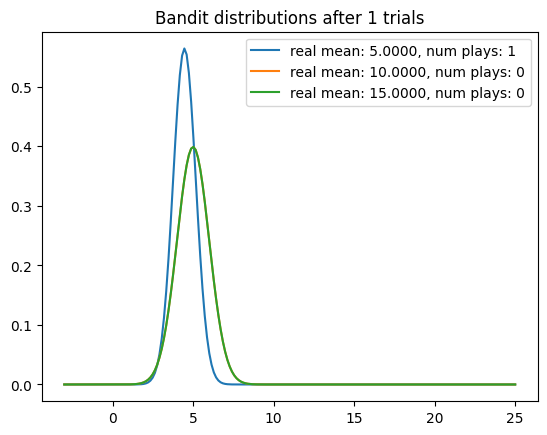

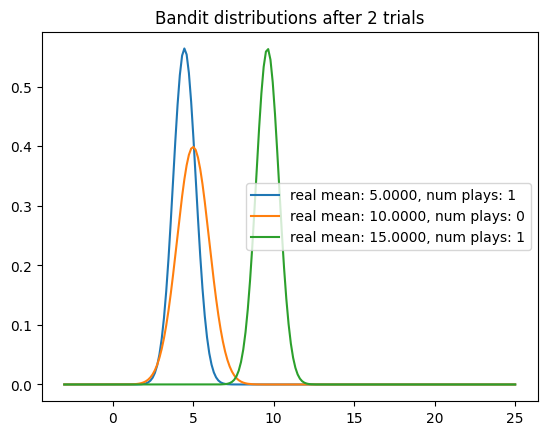

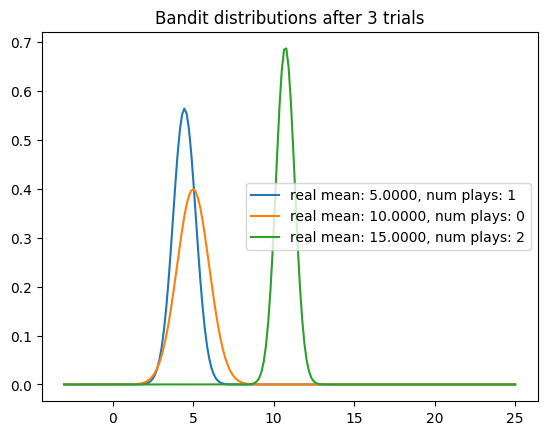

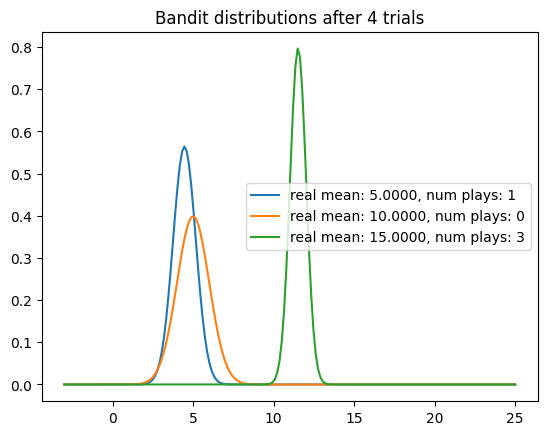

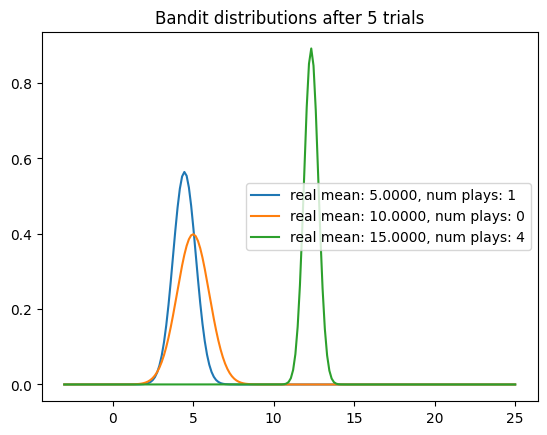

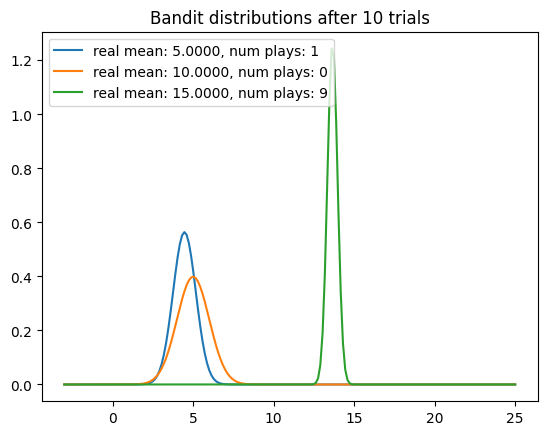

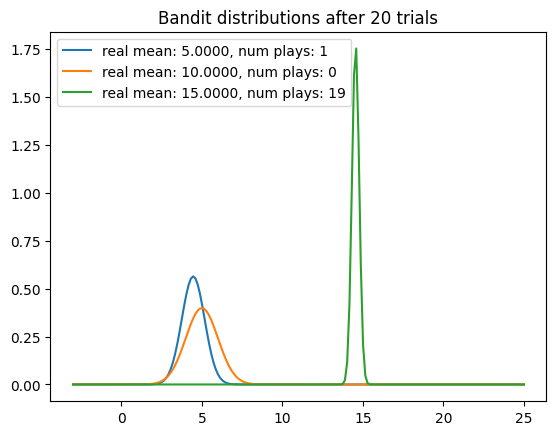

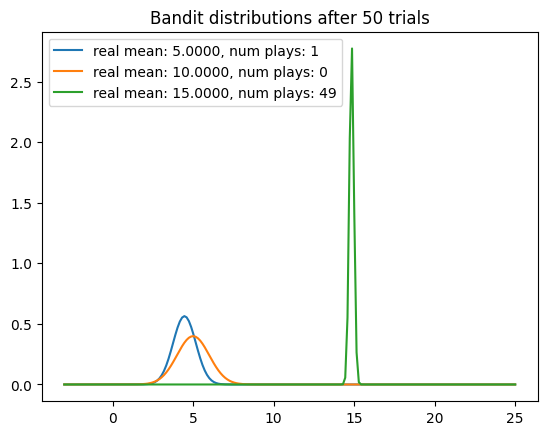

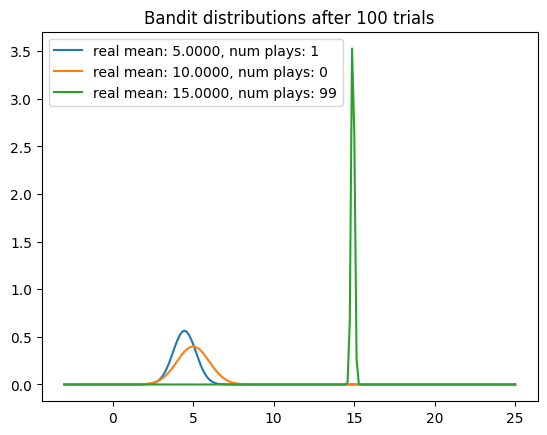

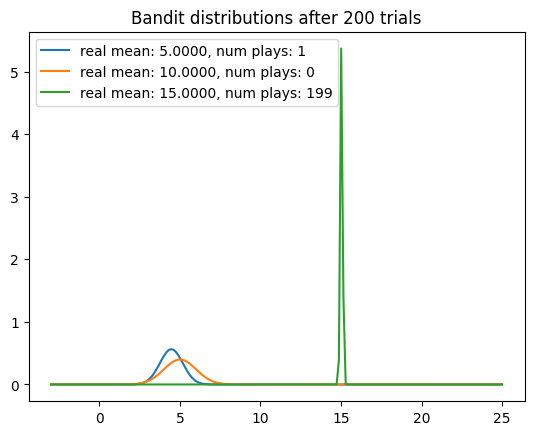

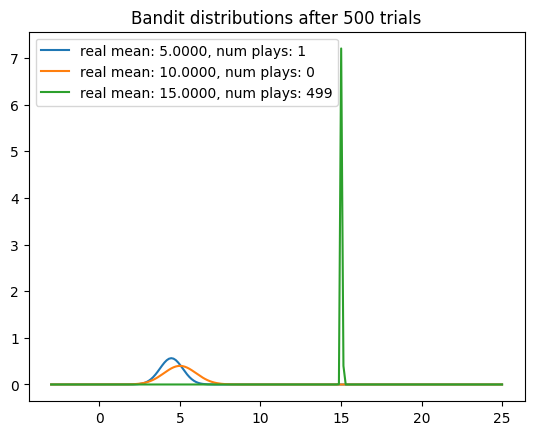

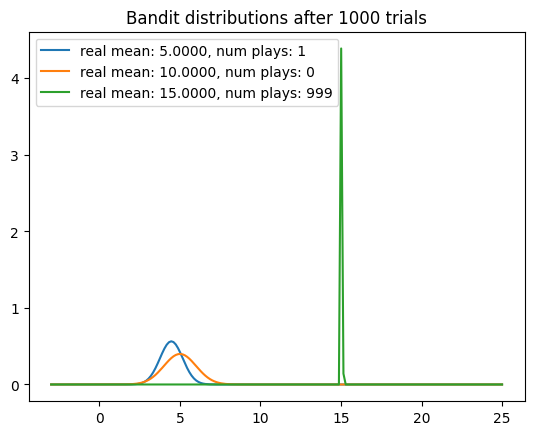

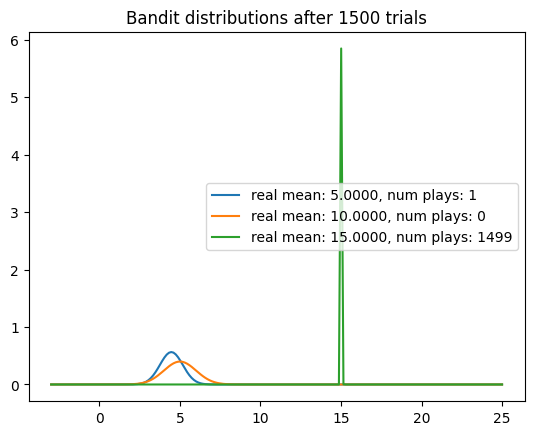

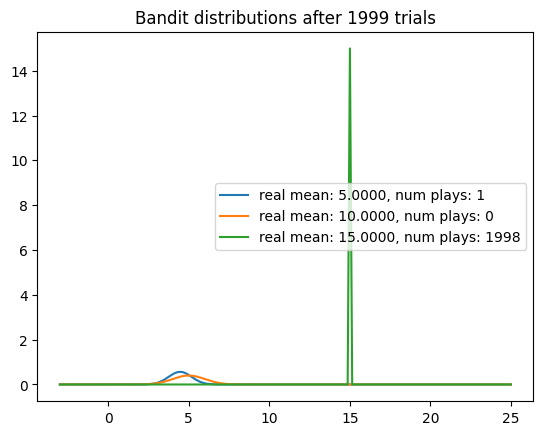

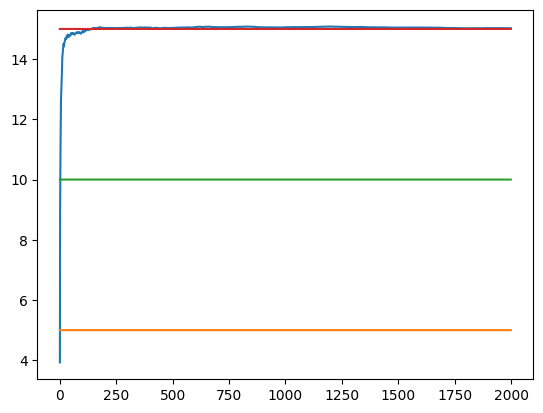

: 

In [80]:

if __name__ == '__main__':
  run_experiment()


